<a href="https://colab.research.google.com/github/fikrilearnstocode/PCD-Assignment/blob/main/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import convolve
import os
import sys

# **Upload Gambar**

Image file ditemukan!
Original image shape: (3457, 3457, 3)
Grayscale image shape: (3457, 3457)


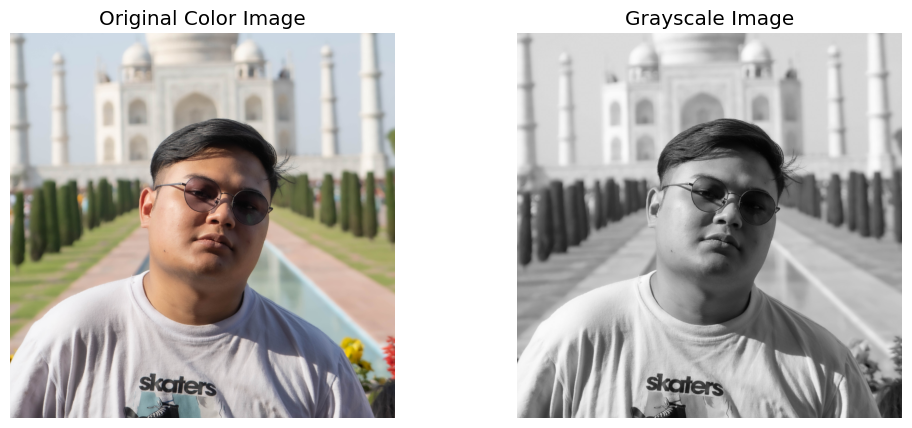

In [ ]:
# Setup untuk display gambar
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Check if image exists
if not os.path.exists('DSC01016.jpg'):
    print("ERROR: gambar belum diupload!")
    print("Silakan upload file terlebih dahulu ke Google Colab.")
    sys.exit()  # Terminate process

print("Image file ditemukan!")

# Load image
img_color = cv2.imread('DSC01016.jpg')
if img_color is None:
    print("ERROR: Gagal membaca file gambar!")
    sys.exit()

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

print(f"Original image shape: {img_color.shape}")
print(f"Grayscale image shape: {img_gray.shape}")

# Display original image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Original Color Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# **1. KONVOLUSI**

Testing convolution function dengan identity kernel...


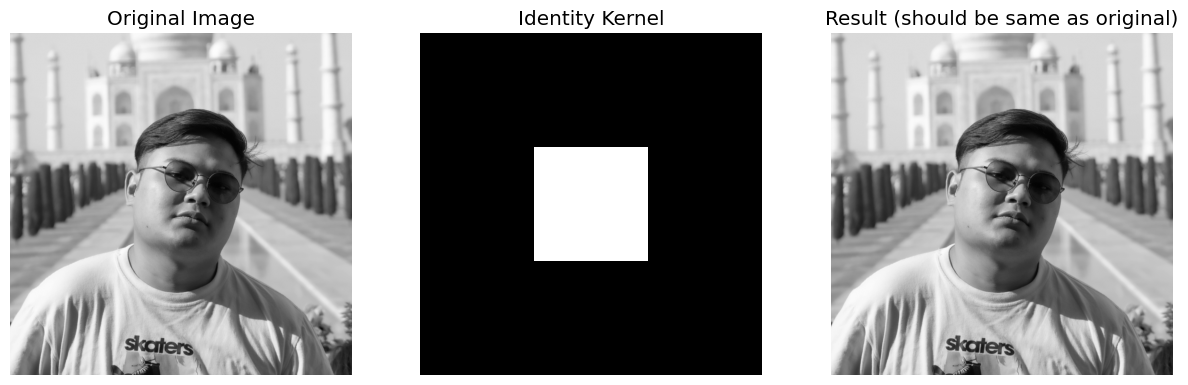

Difference between original and result: 0.0


In [ ]:
def manual_convolution(image, kernel):
    """
    Implementasi manual convolution 2D

    Parameters:
    image: numpy array (grayscale image)
    kernel: numpy array (convolution kernel/filter)

    Returns:
    output: hasil convolution
    """
    # Get dimensions
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding needed
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Add padding to image (zero padding)
    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Initialize output array
    output = np.zeros_like(image, dtype=float)

    # Perform convolution
    for i in range(img_height):
        for j in range(img_width):
            # Extract region of interest
            roi = padded_img[i:i+kernel_height, j:j+kernel_width]

            # Element-wise multiplication and sum
            output[i, j] = np.sum(roi * kernel)

    return output

# Test dengan simple kernel (identity kernel)
identity_kernel = np.array([[0, 0, 0],
                           [0, 1, 0],
                           [0, 0, 0]])

print("Testing convolution function dengan identity kernel...")
result_identity = manual_convolution(img_gray, identity_kernel)

# Display comparison
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(identity_kernel, cmap='gray')
plt.title("Identity Kernel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_identity, cmap='gray')
plt.title("Result (should be same as original)")
plt.axis('off')
plt.show()

# Verify hasil
print(f"Difference between original and result: {np.sum(np.abs(img_gray - result_identity))}")

# **2. SPATIAL FILTERING**

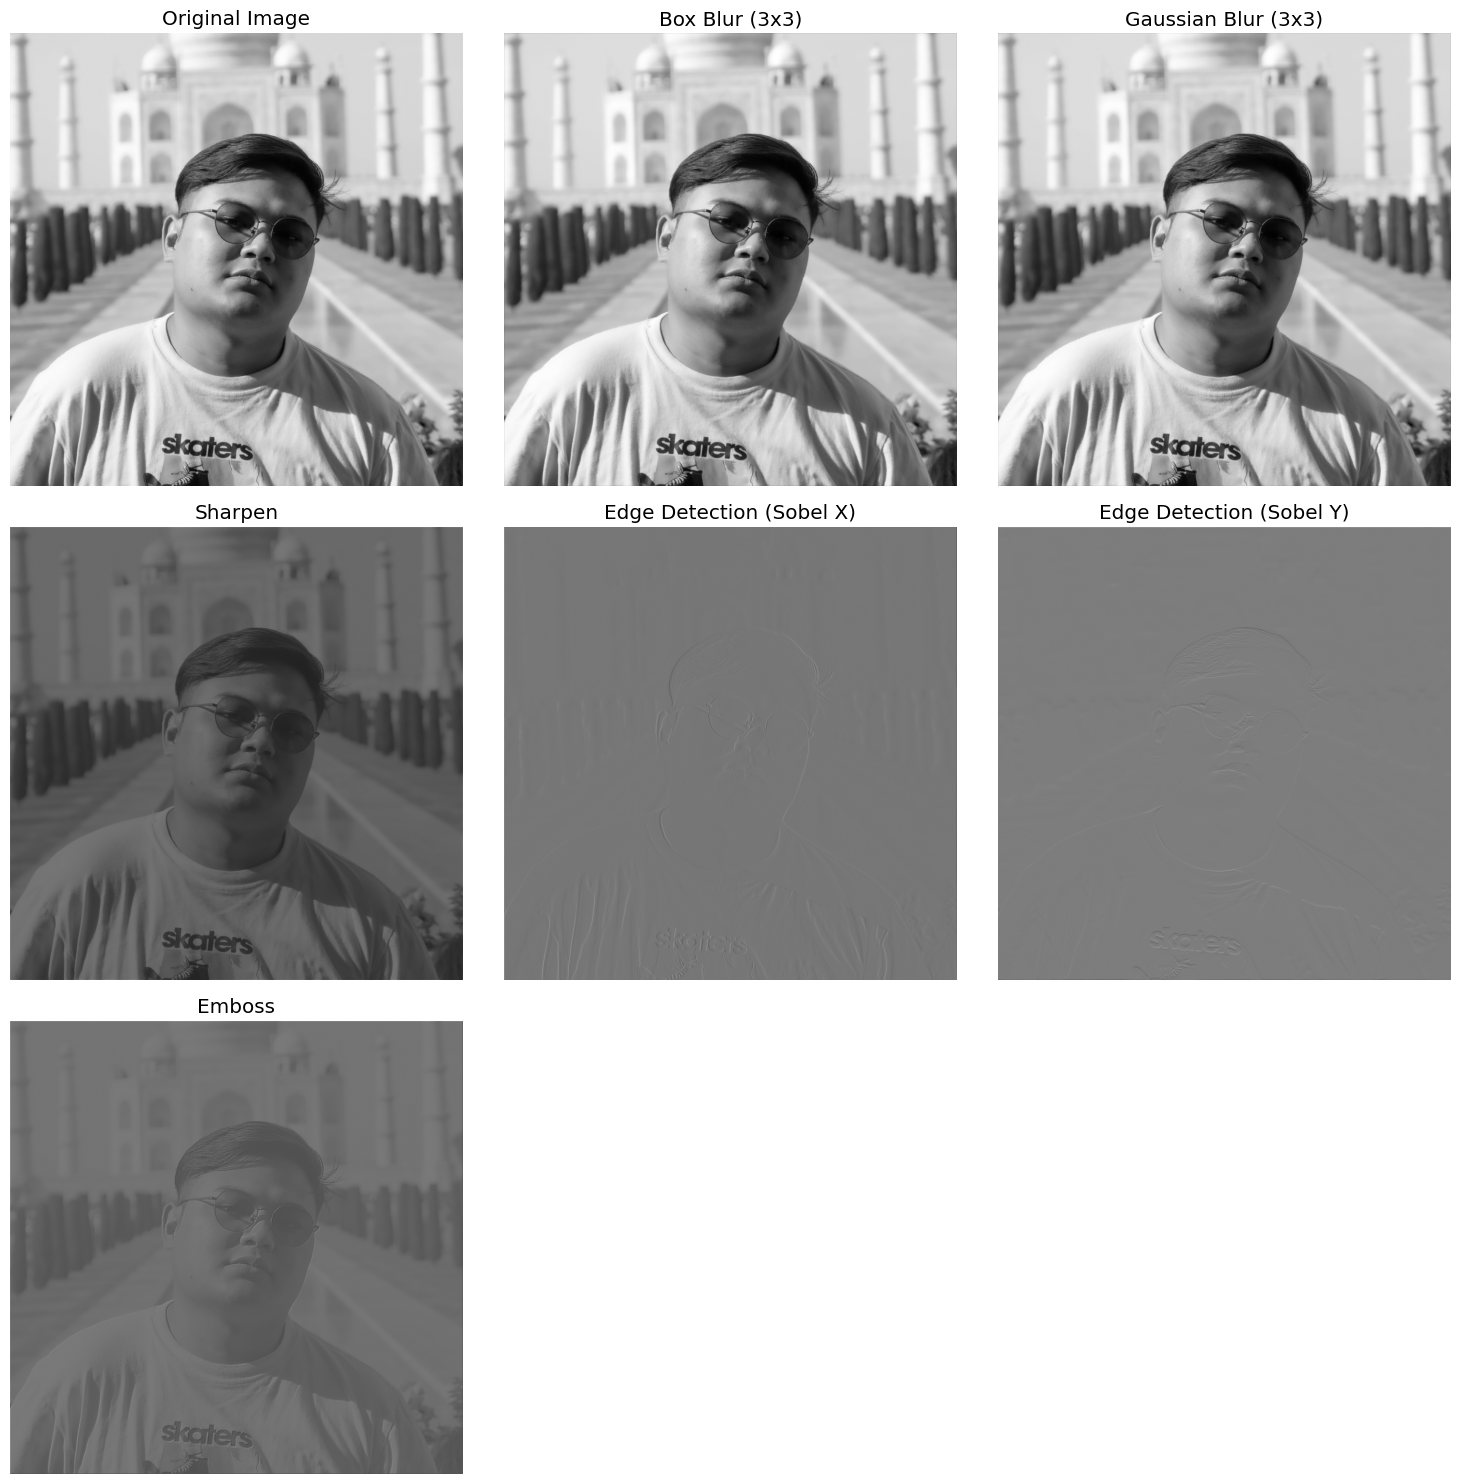

=== PENJELASAN PENGGUNAAN SETIAP KERNEL ===

1. BOX BLUR (3x3):
   - Menghaluskan gambar dengan rata-rata sederhana
   - Cocok untuk: Mengurangi noise, membuat efek blur sederhana
   - Kasus: Pre-processing sebelum edge detection

2. GAUSSIAN BLUR:
   - Menghaluskan gambar dengan distribusi Gaussian
   - Cocok untuk: Mengurangi noise dengan preserving edges lebih baik
   - Kasus: Photo editing, mengurangi detail untuk fokus pada objek utama

3. SHARPEN:
   - Meningkatkan ketajaman gambar
   - Cocok untuk: Gambar yang blur atau kurang tajam
   - Kasus: Memperjelas text, meningkatkan detail foto

4. SOBEL X & Y:
   - Mendeteksi edge/tepi dalam arah horizontal (X) atau vertikal (Y)
   - Cocok untuk: Edge detection, object detection
   - Kasus: Computer vision, analisis struktur gambar

5. EMBOSS:
   - Membuat efek 3D/relief pada gambar
   - Cocok untuk: Artistic effect, texture enhancement
   - Kasus: Graphic design, artistic photo editing


In [ ]:
# Define berbagai kernel untuk spatial filtering
kernels = {
    'Box Blur (3x3)': np.ones((3, 3)) / 9,

    'Gaussian Blur (3x3)': np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]]) / 16,

    'Sharpen': np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]]),

    'Edge Detection (Sobel X)': np.array([[-1, 0, 1],
                                          [-2, 0, 2],
                                          [-1, 0, 1]]),

    'Edge Detection (Sobel Y)': np.array([[-1, -2, -1],
                                          [0, 0, 0],
                                          [1, 2, 1]]),

    'Emboss': np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])
}

# Apply convolution dengan setiap kernel
results = {}
for kernel_name, kernel in kernels.items():
    results[kernel_name] = manual_convolution(img_gray, kernel)

# Display results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

# Show original image
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Show filtered results
for idx, (kernel_name, result) in enumerate(results.items(), 1):
    axes[idx].imshow(result, cmap='gray')
    axes[idx].set_title(kernel_name)
    axes[idx].axis('off')

# Hide unused subplot
for idx in range(len(results) + 1, 9):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Print penjelasan setiap kernel
print("=== PENJELASAN PENGGUNAAN SETIAP KERNEL ===\n")

print("1. BOX BLUR (3x3):")
print("   - Menghaluskan gambar dengan rata-rata sederhana")
print("   - Cocok untuk: Mengurangi noise, membuat efek blur sederhana")
print("   - Kasus: Pre-processing sebelum edge detection\n")

print("2. GAUSSIAN BLUR:")
print("   - Menghaluskan gambar dengan distribusi Gaussian")
print("   - Cocok untuk: Mengurangi noise dengan preserving edges lebih baik")
print("   - Kasus: Photo editing, mengurangi detail untuk fokus pada objek utama\n")

print("3. SHARPEN:")
print("   - Meningkatkan ketajaman gambar")
print("   - Cocok untuk: Gambar yang blur atau kurang tajam")
print("   - Kasus: Memperjelas text, meningkatkan detail foto\n")

print("4. SOBEL X & Y:")
print("   - Mendeteksi edge/tepi dalam arah horizontal (X) atau vertikal (Y)")
print("   - Cocok untuk: Edge detection, object detection")
print("   - Kasus: Computer vision, analisis struktur gambar\n")

print("5. EMBOSS:")
print("   - Membuat efek 3D/relief pada gambar")
print("   - Cocok untuk: Artistic effect, texture enhancement")
print("   - Kasus: Graphic design, artistic photo editing")

# **3. SHARPENING WITH BLURRING**

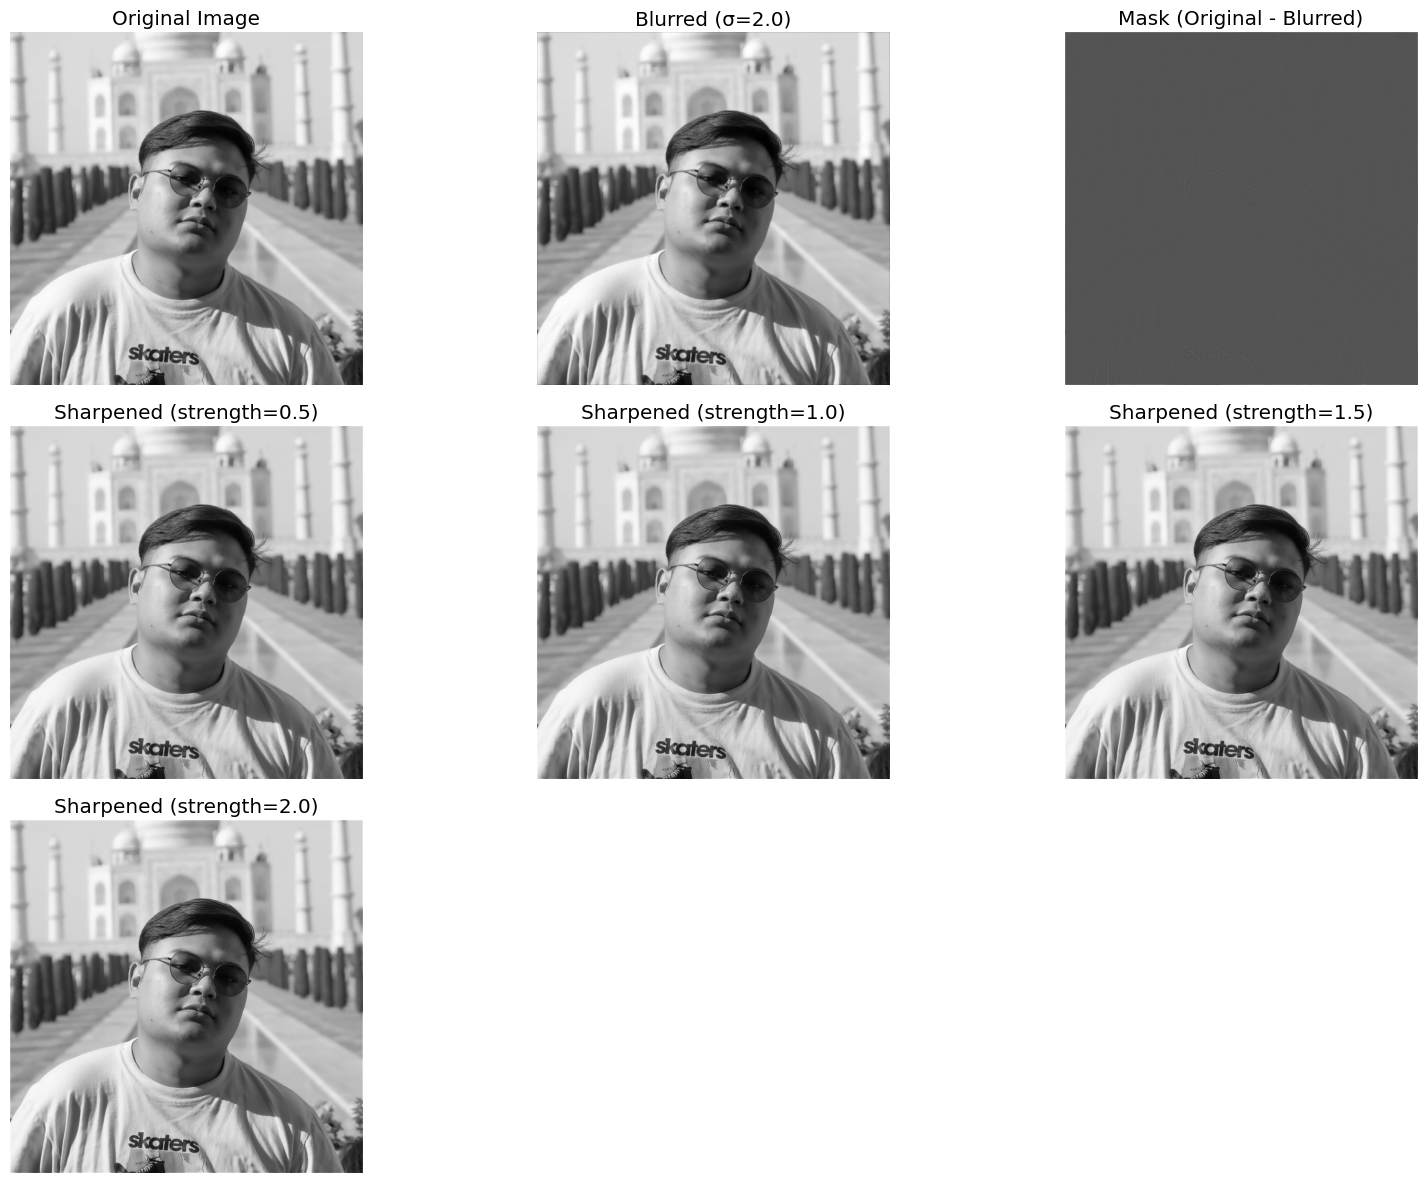

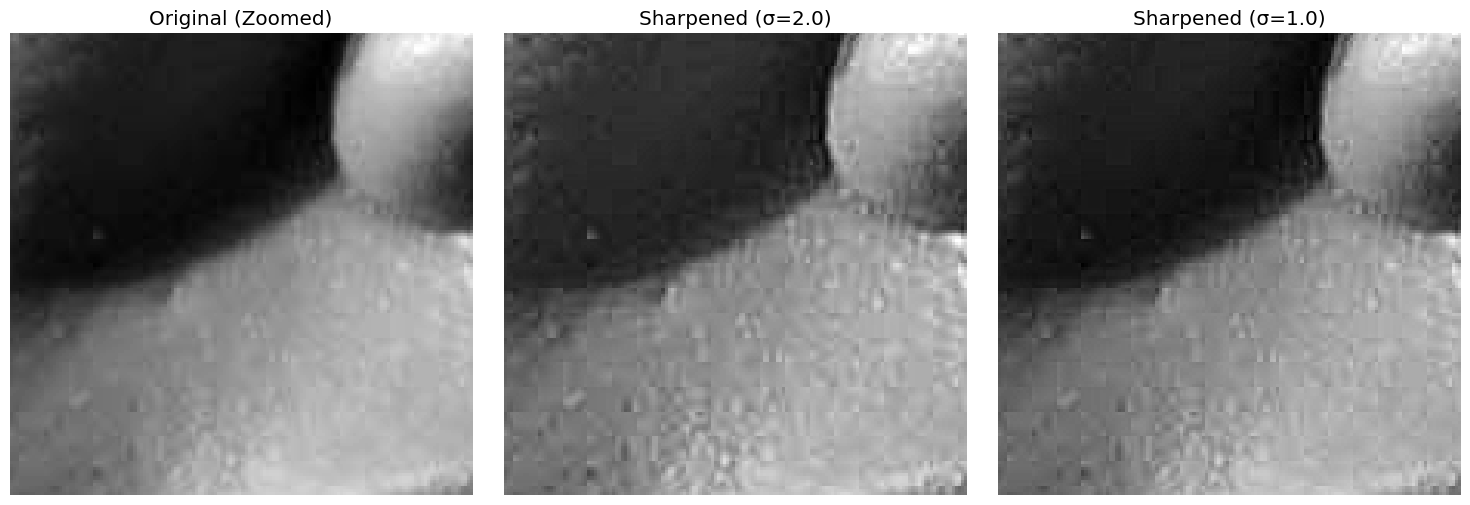

=== PENJELASAN UNSHARP MASKING ===

Unsharp masking adalah teknik sharpening yang counterintuitive:
1. Blur gambar original
2. Hitung selisih (mask) = original - blurred
3. Tambahkan mask ke original: sharpened = original + strength × mask

Parameter penting:
- Sigma (σ): mengontrol seberapa blur, semakin besar sigma (σ) = blur semakin kuat
- Strength: mengontrol intensitas sharpening (0.5-2.0)

Tips penggunaan:
- Strength tinggi (>1.5): untuk gambar yang sangat blur
- Strength rendah (0.5-1.0): untuk enhancement ringan
- Hati-hati dengan oversharpening yang bisa menimbulkan artifact!


In [ ]:
def unsharp_masking(image, sigma=1.0, strength=1.5):
    """
    Sharpening menggunakan unsharp masking technique

    Formula: sharpened = original + strength * (original - blurred)

    Parameters:
    image: input image
    sigma: standard deviation untuk Gaussian blur
    strength: kekuatan sharpening (biasanya 0.5 - 2.0)
    """
    # Create Gaussian kernel berdasarkan sigma
    kernel_size = int(2 * np.ceil(3 * sigma) + 1)
    ax = np.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    gaussian_kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    gaussian_kernel = gaussian_kernel / np.sum(gaussian_kernel)

    # Apply Gaussian blur
    blurred = manual_convolution(image, gaussian_kernel)

    # Calculate mask (difference between original and blurred)
    mask = image - blurred

    # Apply unsharp masking
    sharpened = image + strength * mask

    # Clip values to valid range
    sharpened = np.clip(sharpened, 0, 255)

    return sharpened, blurred, mask

# Test dengan beberapa strength values
strengths = [0.5, 1.0, 1.5, 2.0]
sigma = 2.0

plt.figure(figsize=(16, 12))

# Show original
plt.subplot(3, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Show blurred version
sharpened, blurred, mask = unsharp_masking(img_gray, sigma=sigma, strength=1.0)
plt.subplot(3, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title(f'Blurred (σ={sigma})')
plt.axis('off')

# Show mask
plt.subplot(3, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Mask (Original - Blurred)')
plt.axis('off')

# Show sharpened results dengan beberapa macam strength
for idx, strength in enumerate(strengths, 4):
    sharpened, _, _ = unsharp_masking(img_gray, sigma=sigma, strength=strength)
    plt.subplot(3, 3, idx)
    plt.imshow(sharpened, cmap='gray')
    plt.title(f'Sharpened (strength={strength})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Comparison detail - zoom in pada bagian tertentu
# Ambil region of interest (ROI) untuk melihat detail
roi_size = 150
center_y, center_x = img_gray.shape[0]//2, img_gray.shape[1]//2
roi_y1 = center_y - roi_size//2
roi_y2 = center_y + roi_size//2
roi_x1 = center_x - roi_size//2
roi_x2 = center_x + roi_size//2

# Show ROI comparison
plt.figure(figsize=(15, 5))

roi_original = img_gray[roi_y1:roi_y2, roi_x1:roi_x2]
sharpened_1, _, _ = unsharp_masking(img_gray, sigma=2.0, strength=1.5)
sharpened_2, _, _ = unsharp_masking(img_gray, sigma=1.0, strength=1.5)
roi_sharpened_1 = sharpened_1[roi_y1:roi_y2, roi_x1:roi_x2]
roi_sharpened_2 = sharpened_2[roi_y1:roi_y2, roi_x1:roi_x2]

plt.subplot(1, 3, 1)
plt.imshow(roi_original, cmap='gray')
plt.title('Original (Zoomed)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(roi_sharpened_1, cmap='gray')
plt.title('Sharpened (σ=2.0)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(roi_sharpened_2, cmap='gray')
plt.title('Sharpened (σ=1.0)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("=== PENJELASAN UNSHARP MASKING ===")
print("\nUnsharp masking adalah teknik sharpening yang counterintuitive:")
print("1. Blur gambar original")
print("2. Hitung selisih (mask) = original - blurred")
print("3. Tambahkan mask ke original: sharpened = original + strength × mask")
print("\nParameter penting:")
print("- Sigma (σ): mengontrol seberapa blur, semakin besar sigma (σ) = blur semakin kuat")
print("- Strength: mengontrol intensitas sharpening (0.5-2.0)")
print("\nTips penggunaan:")
print("- Strength tinggi (>1.5): untuk gambar yang sangat blur")
print("- Strength rendah (0.5-1.0): untuk enhancement ringan")
print("- Hati-hati dengan oversharpening yang bisa menimbulkan artifact!")

# **4. COMPARISON AND SUMMARY**

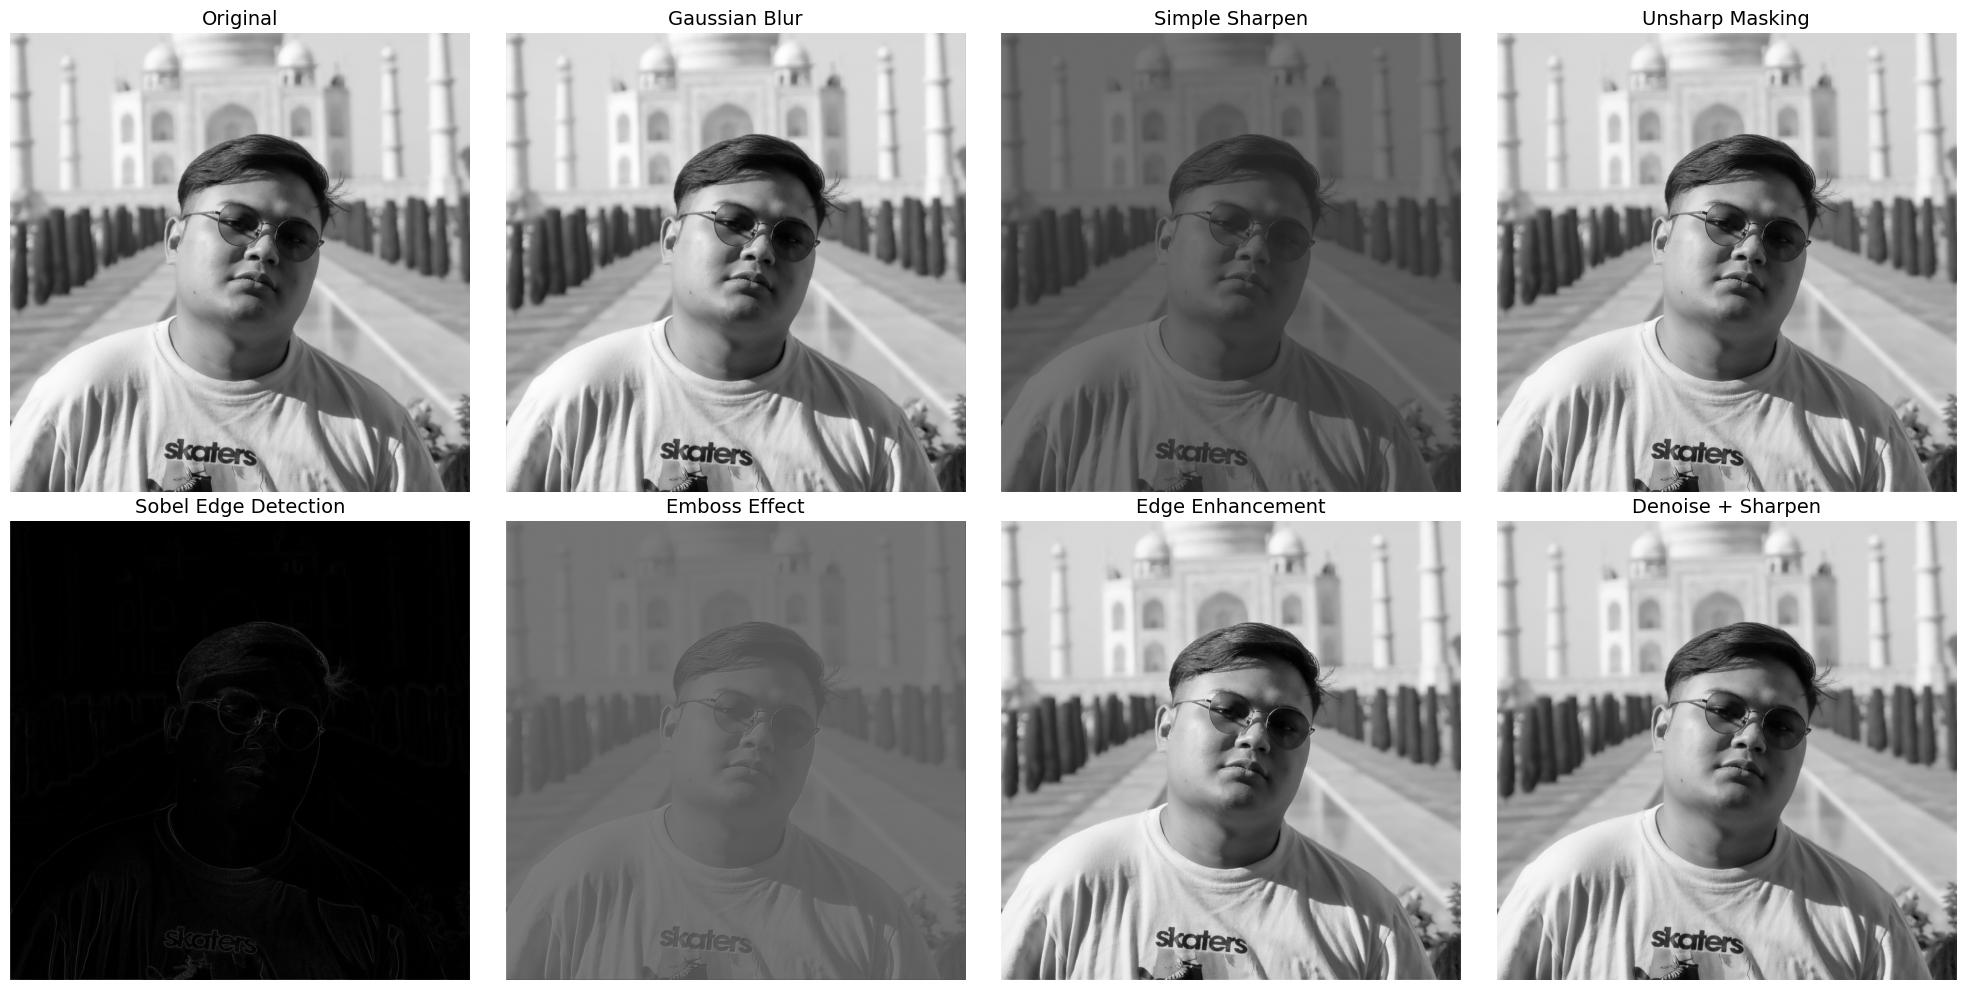

SUMMARY: IMAGE PROCESSING WITH CONVOLUTION

📊 CONVOLUTION BASICS:
- Convolution adalah operasi matematika untuk apply filter/kernel ke gambar
- Setiap pixel yang baru = sum(kernel × neighboring pixels)
- Padding diperlukan untuk menghandle pixel di tepi gambar

🔧 SPATIAL FILTERING TECHNIQUES:

1. SMOOTHING/BLURRING:
   • Box Filter: Simple averaging, fast but less natural
   • Gaussian: Natural blur, better edge preservation
   Use case: Noise reduction, artistic effects

2. SHARPENING:
   • Simple Sharpen: Direct edge enhancement
   • Unsharp Masking: Sophisticated technique using blur
   Use case: Enhance blurry images, increase detail visibility

3. EDGE DETECTION:
   • Sobel: Directional edge detection (X/Y)
   • Combined: Magnitude for full edge detection
   Use case: Object detection, image segmentation

💡 BEST PRACTICES:
1. For noisy images: Gaussian blur → Sharpen
2. For blur images: Unsharp masking with proper strength
3. For analysis: Edge detection → Further processing
4. Al

In [ ]:
# Final comparison - apply berbagai macam teknik pada satu gambar
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Row 1: Original dan basic filters
axes[0,0].imshow(img_gray, cmap='gray')
axes[0,0].set_title('Original', fontsize=14)
axes[0,0].axis('off')

# Gaussian blur
gaussian_result = manual_convolution(img_gray, kernels['Gaussian Blur (3x3)'])
axes[0,1].imshow(gaussian_result, cmap='gray')
axes[0,1].set_title('Gaussian Blur', fontsize=14)
axes[0,1].axis('off')

# Simple sharpen
sharpen_result = manual_convolution(img_gray, kernels['Sharpen'])
axes[0,2].imshow(sharpen_result, cmap='gray')
axes[0,2].set_title('Simple Sharpen', fontsize=14)
axes[0,2].axis('off')

# Unsharp masking
unsharp_result, _, _ = unsharp_masking(img_gray, sigma=1.5, strength=1.5)
axes[0,3].imshow(unsharp_result, cmap='gray')
axes[0,3].set_title('Unsharp Masking', fontsize=14)
axes[0,3].axis('off')

# Row 2: Edge detection dan kombinasi
# Sobel edge detection
sobel_x = manual_convolution(img_gray, kernels['Edge Detection (Sobel X)'])
sobel_y = manual_convolution(img_gray, kernels['Edge Detection (Sobel Y)'])
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
axes[1,0].imshow(sobel_magnitude, cmap='gray')
axes[1,0].set_title('Sobel Edge Detection', fontsize=14)
axes[1,0].axis('off')

# Emboss
emboss_result = manual_convolution(img_gray, kernels['Emboss'])
axes[1,1].imshow(emboss_result, cmap='gray')
axes[1,1].set_title('Emboss Effect', fontsize=14)
axes[1,1].axis('off')

# Edge-enhanced sharpening (combine edge detection with sharpening)
edge_enhance = img_gray + 0.3 * sobel_magnitude
edge_enhance = np.clip(edge_enhance, 0, 255)
axes[1,2].imshow(edge_enhance, cmap='gray')
axes[1,2].set_title('Edge Enhancement', fontsize=14)
axes[1,2].axis('off')

# Noise reduction + sharpening
# First blur to reduce noise, then sharpen
denoised = manual_convolution(img_gray, kernels['Gaussian Blur (3x3)'])
final_enhanced, _, _ = unsharp_masking(denoised, sigma=1.0, strength=1.2)
axes[1,3].imshow(final_enhanced, cmap='gray')
axes[1,3].set_title('Denoise + Sharpen', fontsize=14)
axes[1,3].axis('off')

plt.tight_layout()
plt.show()

# Create processing pipeline recommendation
print("="*60)
print("SUMMARY: IMAGE PROCESSING WITH CONVOLUTION")
print("="*60)

print("\n CONVOLUTION BASICS:")
print("- Convolution adalah operasi matematika untuk apply filter/kernel ke gambar")
print("- Setiap pixel yang baru = sum(kernel × neighboring pixels)")
print("- Padding diperlukan untuk menghandle pixel di tepi gambar")

print("\n SPATIAL FILTERING TECHNIQUES:")
print("\n1. SMOOTHING/BLURRING:")
print("   • Box Filter: Simple averaging, fast but less natural")
print("   • Gaussian: Natural blur, better edge preservation")
print("   Use case: Noise reduction, artistic effects")

print("\n2. SHARPENING:")
print("   • Simple Sharpen: Direct edge enhancement")
print("   • Unsharp Masking: Sophisticated technique using blur")
print("   Use case: Enhance blurry images, increase detail visibility")

print("\n3. EDGE DETECTION:")
print("   • Sobel: Directional edge detection (X/Y)")
print("   • Combined: Magnitude for full edge detection")
print("   Use case: Object detection, image segmentation")

print("\n BEST PRACTICES:")
print("1. For noisy images: Gaussian blur → Sharpen")
print("2. For blur images: Unsharp masking with proper strength")
print("3. For analysis: Edge detection → Further processing")
print("4. Always consider the trade-off between enhancement and artifacts")

print("\n RECOMMENDED PIPELINE:")
print("Original → Denoise (if needed) → Enhancement → Final adjustment")

# Save
best_result = final_enhanced
cv2.imwrite('enhanced_result.jpg', best_result)
print("\n Enhanced result saved as 'enhanced_result.jpg'")